# Roller Coaster

#### overview
This project is slightly different than others you have encountered thus far on Codecademy. Instead of a step-by-step tutorial, this project contains a series of open-ended requirements which describe the project you’ll be building. There are many possible ways to correctly fulfill all of these requirements, and you should expect to use the internet, Codecademy, and other resources when you encounter a problem that you cannot easily solve.

#### Project Goals
You will work to create several data visualizations that will give you insight into the world of roller coasters.

## Prerequisites

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
%matplotlib inline

## Project Requirements

## Part I - Load Data

In [138]:
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
wood.head(2)

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013


The Golden Ticket Awards datasets include the following columns:
- Rank: rank of the roller coaster in a given year
- Name: name of the roller coaster
- Park: amusement park where the roller coaster is located
- Location: location of the amusement park where the roller coaster is located
- Supplier: manufacturer of the roller coaster
- Year Built: year the roller coaster was built
- Points: points scored in a given year’s ranking
- Year of Rank: year the roller coaster achieved a given rank

In [3]:
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
steel.head(2)

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013


In [4]:
wood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          180 non-null    int64 
 1   Name          180 non-null    object
 2   Park          180 non-null    object
 3   Location      180 non-null    object
 4   Supplier      179 non-null    object
 5   Year Built    180 non-null    int64 
 6   Points        180 non-null    int64 
 7   Year of Rank  180 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 11.4+ KB


(Missing value in column Supplier), let's check it out!

In [5]:
wood.isnull().sum()

Rank            0
Name            0
Park            0
Location        0
Supplier        1
Year Built      0
Points          0
Year of Rank    0
dtype: int64

In [6]:
# Fill the missing value with .mode()
wood = wood.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [7]:
wood.isnull().sum()

Rank            0
Name            0
Park            0
Location        0
Supplier        0
Year Built      0
Points          0
Year of Rank    0
dtype: int64

In [8]:
wood.describe(include='all')

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
count,180.000000,180,180,180,180,180.000000,180.000000,180.000000
unique,NaN,61,54,53,32,NaN,NaN,NaN
top,NaN,El Toro,Knoebels Amusement Resort,"Santa Claus, Ind.",Great Coasters Int.,NaN,NaN,NaN
freq,NaN,8,12,12,33,NaN,NaN,NaN
mean,22.127778,NaN,NaN,NaN,NaN,1994.450000,392.388889,2016.500000
std,15.217246,NaN,NaN,NaN,NaN,24.309061,381.816130,1.388299
min,1.000000,NaN,NaN,NaN,NaN,1914.000000,66.000000,2013.000000
25%,8.000000,NaN,NaN,NaN,NaN,1994.000000,121.250000,2016.000000
50%,20.500000,NaN,NaN,NaN,NaN,2003.000000,213.500000,2017.000000
75%,35.250000,NaN,NaN,NaN,NaN,2009.000000,579.500000,2018.000000


In [9]:
steel.describe(include='all')

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
count,180.000000,180,180,180,180,180.000000,180.000000,180.000000
unique,NaN,63,36,36,15,NaN,NaN,NaN
top,NaN,Goliath,Cedar Point,"Sandusky, Ohio",B&M,NaN,NaN,NaN
freq,NaN,8,19,19,77,NaN,NaN,NaN
mean,22.127778,NaN,NaN,NaN,NaN,2004.655556,325.433333,2016.500000
std,15.186377,NaN,NaN,NaN,NaN,9.511723,279.650322,1.388299
min,1.000000,NaN,NaN,NaN,NaN,1976.000000,59.000000,2013.000000
25%,8.000000,NaN,NaN,NaN,NaN,2000.000000,112.250000,2016.000000
50%,20.500000,NaN,NaN,NaN,NaN,2006.000000,246.000000,2017.000000
75%,35.250000,NaN,NaN,NaN,NaN,2012.000000,427.000000,2018.000000


- How many roller coasters are included in each ranking dataset? 
    - Wood : 61 roller coasters
    - Steel : 63 roller coasters
- How many different roller coaster suppliers are included in the rankings?
    - Wood : 32 suppliers
    - Steel : 15 suppliers
- Do some years include more rankings than other years?

If you have a favorite amusement park or there is one near where you live, subset one of the DataFrames on your chosen park. Are there any ranked roller coasters there?

In [10]:
wood_year = wood.groupby('Year of Rank').Rank.count().reset_index()
wood_year

,Year of Rank,Rank
0,2013,10
1,2014,10
2,2015,10
3,2016,50
4,2017,50
5,2018,50


In [11]:
steel_year = steel.groupby('Year of Rank').Rank.count().reset_index()
steel_year

,Year of Rank,Rank
0,2013,10
1,2014,10
2,2015,10
3,2016,50
4,2017,50
5,2018,50


In [129]:
wood['Name'].unique()

array(['Boulder Dash', 'El Toro', 'Phoenix', 'The Voyage', 'Thunderhead',
       'Ravine Flyer II', 'Outlaw Run', 'The Beast', 'Lightning Racer',
       'Shivering Timbers', 'Gold Striker', 'Balder', 'Lightning Rod',
       'Goliath', 'Prowler', 'The Raven', 'The Legend', 'Giant Dipper',
       'Colossos', 'Jack Rabbit', 'Thunderbolt', 'Cú Chulainn', 'Wodan',
       'Troy', 'Comet', 'Cyclone', 'Wildfire', 'GhostRider',
       'Playland Wooden Coaster', 'The Boss', 'Wild Mouse',
       'American Thunder', 'White Lightning', 'Megafobia', 'Hades 360',
       'Rampage', 'Blue Streak', 'Screamin’ Eagle', 'Tremors',
       'Flying Turns', 'Racer', 'T Express', 'Twister', 'Wooden Warrior',
       'Kentucky Rumbler', 'Wood Coaster', 'Boardwalk Bullet', 'Voyage',
       'Beast', 'Mystic Timbers', 'Raven', 'Legend', 'Boss', 'Switchback',
       'Grizzly (KD)', 'Grand National', 'Renegade', 'Rutschebanan',
       'Grizzly', 'Wild One', 'Mine Blower'], dtype=object)

In [13]:
wood.Park[wood['Name'] == 'El Toro'].unique()

array(['Six Flags Great Adventure', 'Freitzeitpark Plohn'], dtype=object)

In [14]:
wood.Park[wood['Name'] == 'Boulder Dash'].unique()

array(['Lake Compounce'], dtype=object)

### Function to plot ranking of roller coaster overtime 

Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster’s name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

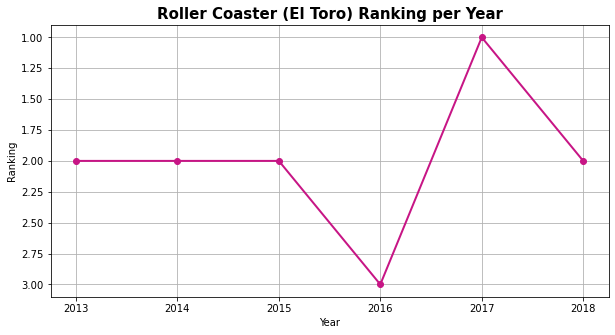

In [15]:
# Create a function to plot rankings over time for 1 roller coaster

def coaster_ranking(coaster_name, park_name, material):
    if material == 'wood':
        df = wood[(wood['Name'] == coaster_name) & (wood['Park'] == park_name)]
        
    if material == 'steel':
        df = steel[(steel['Name'] == coaster_name) & (steel['Park'] == park_name)]
        
    x_value = df['Year of Rank']
    y_value = df['Rank']
    
    fig, ax = plt.subplots(figsize=(10,5))
    plt.plot(x_value, y_value, marker='o', linewidth=2, color='mediumvioletred')
    ax.set_xlabel('Year')
    ax.set_ylabel('Ranking')
    ax.set_title('Roller Coaster (El Toro) Ranking per Year', fontsize=15, weight='bold')
    ax.invert_yaxis()
    plt.grid()
    
coaster_ranking('El Toro', 'Six Flags Great Adventure', 'wood')

### Function to compare the ranking of two roller coasters overtime 

Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters’ names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

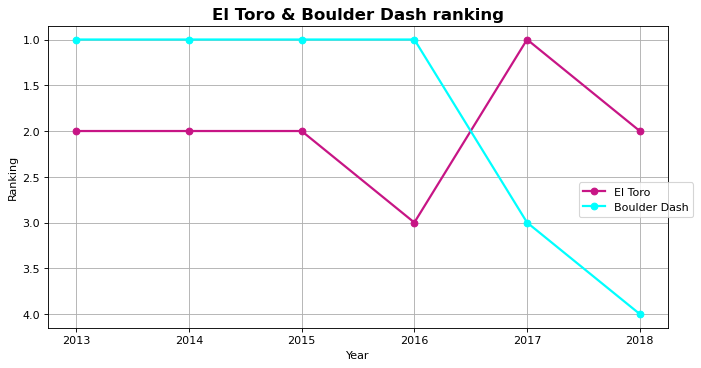

In [16]:
# function to plot rankings over time for 2 roller coasters

def coaster_2_ranking(coaster1_name, park1_name, coaster2_name, park2_name, material):
    df1 = material[(material['Name'] == coaster1_name) & (material['Park'] == park1_name)]
    df2 = material[(material['Name'] == coaster2_name) & (material['Park'] == park2_name)]
        
    fig, ax = plt.subplots(figsize=(10,5), dpi=80)
    ax.plot(df1['Year of Rank'], df1['Rank'], marker='o', linewidth=2, color='mediumvioletred')
    ax.plot(df2['Year of Rank'], df2['Rank'], marker='o', linewidth=2, color='cyan')
    ax.invert_yaxis()   
                
    ax.set_xlabel('Year')
    ax.set_ylabel('Ranking')
    ax.set_title('{} & {} ranking'.format(coaster1_name, coaster2_name), fontsize=15, weight='bold')
    plt.legend(['El Toro', 'Boulder Dash'], loc='best', bbox_to_anchor=(1.05, 0.5))   
    plt.grid()

coaster_2_ranking('El Toro', 'Six Flags Great Adventure', 'Boulder Dash', 'Lake Compounce', wood)

### Function to compare the evolution of the top n ranking for roller coasters over time 

Write a function that will plot the ranking of the top n ranked roller coasters over time as lines. Your function should take a number n and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

For example, if n == 5, your function should plot a line for each roller coaster that has a rank of 5 or lower.

Call your function with a value for n and either the wood ranking or steel ranking DataFrame.

In [191]:
# Create a function to plot top n rankings over time

def top_ranking(ranking_df, n):
    top_n_rankings = ranking_df[ranking_df['Rank'] <= n]
    
    fig, ax = plt.subplots(figsize=(10, 5))

    for coaster in set(top_n_rankings['Name']):
        coaster_rankings = top_n_rankings[top_n_rankings['Name'] == coaster]
        ax.plot(coaster_rankings['Year of Rank'], coaster_rankings['Rank'], label=coaster, marker='o')
    
    ax.set_yticks([i for i in range(1,6)])
    ax.invert_yaxis()
    
    ax.set_title(f"Top 5 Rankings", fontsize=15, weight='bold')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rank')
    plt.legend(loc='best', bbox_to_anchor=(1.05, 0.5))

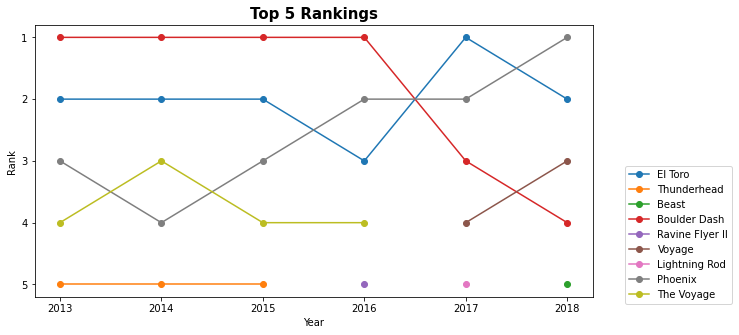

In [192]:
top_ranking(wood, 5)

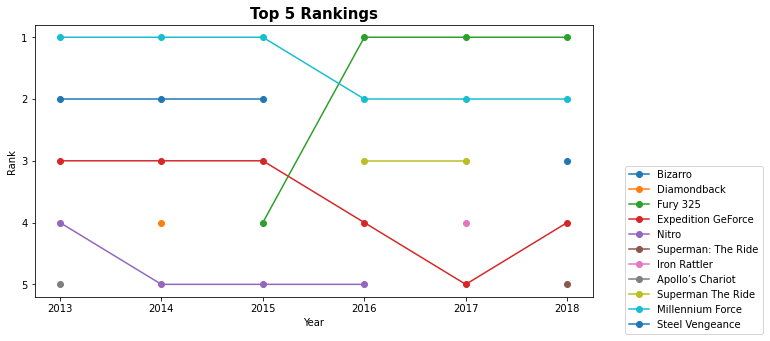

In [193]:
top_ranking(steel, 5)

## Part II 

### Load Data

Now that you’ve visualized rankings over time, let’s dive into the actual statistics of roller coasters themselves. 

In [144]:
roller = pd.read_csv('roller_coasters.csv')
roller.head(3)

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating


The Captain Coaster dataset includes the following columns:
- name: name of the roller coaster
- material_type: the material used to build the roller coaster
- seating_type: the type of seating used on the roller coaster
- speed: maximum speed of the roller coaster, in kilometers/hour
- height: maximum height of the roller coaster, in meters
- length: length of the roller coaster, in meters
- num_inversions: total number of inversions on the roller coaster
- manufacturer: manufacturer of the roller coaster
- park: amusement park where the roller coaster is located
- status: operating status of the roller coaster

In [182]:
roller.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 0 to 2799
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1279 non-null   object 
 1   material_type   1279 non-null   object 
 2   seating_type    1279 non-null   object 
 3   speed           1279 non-null   float64
 4   height          1279 non-null   float64
 5   length          1279 non-null   float64
 6   num_inversions  1279 non-null   float64
 7   manufacturer    1279 non-null   object 
 8   park            1279 non-null   object 
 9   status          1279 non-null   object 
dtypes: float64(4), object(6)
memory usage: 109.9+ KB


In [146]:
roller.describe(include='all')

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
count,2799,2802,2802,1478.000000,1667.000000,1675.000000,2405.000000,2802,2802,2802
unique,2075,4,15,NaN,NaN,NaN,NaN,122,718,9
top,Dragon,Steel,Sit Down,NaN,NaN,NaN,NaN,na,Foire,status.operating
freq,26,2059,2217,NaN,NaN,NaN,NaN,307,121,2172
mean,NaN,NaN,NaN,70.102842,26.725855,606.147463,0.809563,NaN,NaN,NaN
std,NaN,NaN,NaN,28.338394,35.010166,393.840496,1.652254,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,-1.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,47.000000,13.000000,335.000000,0.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,72.000000,23.000000,500.000000,0.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,88.000000,35.000000,839.000000,1.000000,NaN,NaN,NaN


### clean data

In [147]:
#check the null
roller.isnull().sum()

name                 3
material_type        0
seating_type         0
speed             1324
height            1135
length            1127
num_inversions     397
manufacturer         0
park                 0
status               0
dtype: int64

In [148]:
roller.isna().any()

name               True
material_type     False
seating_type      False
speed              True
height             True
length             True
num_inversions     True
manufacturer      False
park              False
status            False
dtype: bool

In [149]:
roller = roller.dropna()

In [151]:
roller.describe()

,speed,height,length,num_inversions
count,1279.000000,1279.000000,1279.000000,1279.000000
mean,71.574668,28.935106,641.050039,1.265833
std,28.124453,38.562609,396.610955,1.973537
min,0.000000,0.000000,0.000000,0.000000
25%,50.000000,15.000000,354.500000,0.000000
50%,75.000000,25.000000,566.000000,0.000000
75%,89.000000,36.000000,877.000000,2.000000
max,240.000000,902.000000,2479.000000,14.000000


In [185]:
# select rows wich have non-zero (speed, height, length)
roller_coaster = roller.loc[(roller.speed != 0) & (roller.height != 0) & (roller.length != 0)]
roller_coaster.describe(include='all')

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
count,1265,1265,1265,1265.000000,1265.000000,1265.000000,1265.000000,1265,1265,1265
unique,1044,4,14,NaN,NaN,NaN,NaN,73,404,8
top,Boomerang,Steel,Sit Down,NaN,NaN,NaN,NaN,Vekoma,Six Flags Magic Mountain,status.operating
freq,20,1040,953,NaN,NaN,NaN,NaN,217,22,1031
mean,NaN,NaN,NaN,72.331225,29.180237,646.832411,1.275889,NaN,NaN,NaN
std,NaN,NaN,NaN,27.311642,38.667040,394.309479,1.977467,NaN,NaN,NaN
min,NaN,NaN,NaN,7.000000,2.000000,25.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,50.000000,15.000000,360.000000,0.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,75.000000,25.000000,581.000000,0.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,89.000000,36.000000,881.000000,2.000000,NaN,NaN,NaN


In [190]:
roller_coaster['material_type'].value_counts().reset_index()

,index,material_type
0,Steel,1040
1,Wooden,136
2,na,72
3,Hybrid,17


### Function to plot any numerical data into an histogram

Write a function that plots a histogram of any numeric column of the roller coaster DataFrame.

remove all missing values before plotting the histogram.

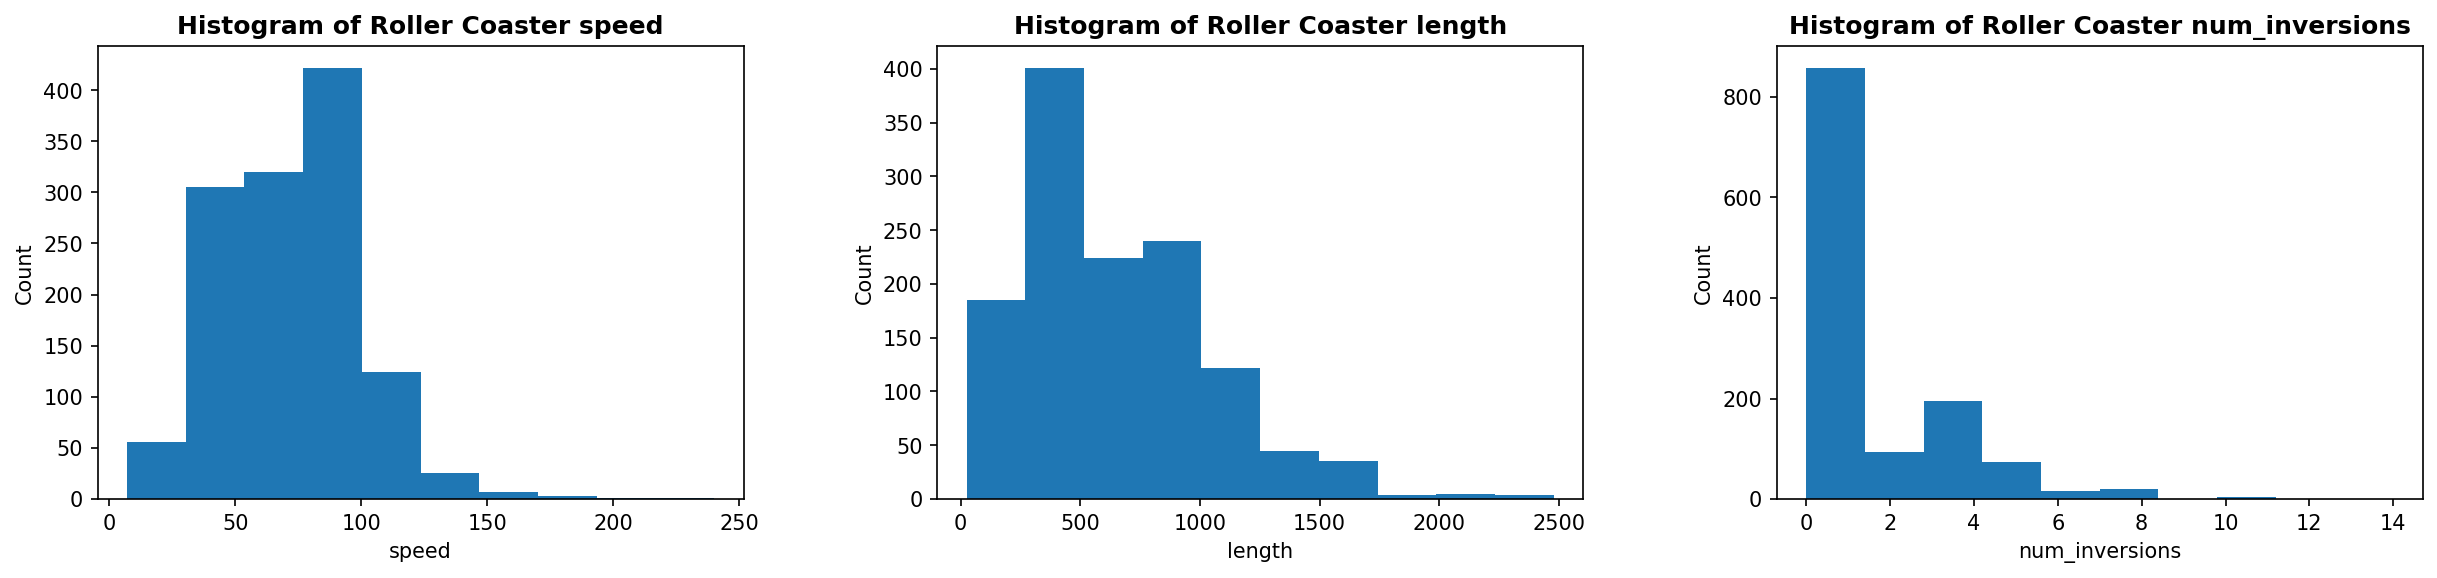

In [181]:
# Create a function to plot histogram of column values

def plot_histogram(dataset, column):
    plt.hist(dataset[column])
    plt.title('Histogram of Roller Coaster {}'.format(column), weight='bold')
    plt.xlabel(column)
    plt.ylabel('Count')

# Create histogram of roller coaster speed
plt.figure(figsize=(20,10), dpi=150)
plt.subplot(2,3,1)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plot_histogram(roller_coaster, 'speed')

# Create histogram of roller coaster length
plt.subplot(2,3,2)
plot_histogram(roller_coaster, 'length')

# Create histogram of roller coaster number of inversions
plt.subplot(2,3,3)
plot_histogram(roller_coaster, 'num_inversions')

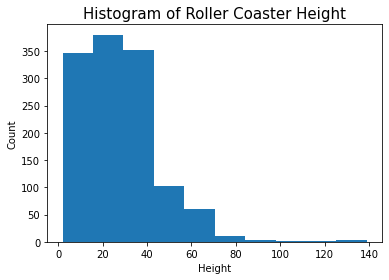

In [172]:
# Create a function to plot histogram of height values
def plot_histogram_height(coaster_df):
    heights = coaster_df[coaster_df['height'] <= 140]['height']
    plt.hist(heights, linewidth=2)
    plt.title('Histogram of Roller Coaster Height', fontsize=15)
    plt.xlabel('Height')
    plt.ylabel('Count')
    
plot_histogram_height(roller_coaster)

### Function to plot the number of inversions into a bar chart of all the roller coasters for a park

Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

In [155]:
roller_park = roller_coaster['park'].value_counts().reset_index()
print(roller_park[:10]) # the biggest 10 park

                      index  park
0  Six Flags Magic Mountain    22
1                     Foire    21
2               Cedar Point    21
3       Canada's Wonderland    16
4              Kings Island    16
5   Six Flags Great America    15
6            Kings Dominion    14
7      Six flags Over Texas    14
8                 Carowinds    14
9               Europa Park    13


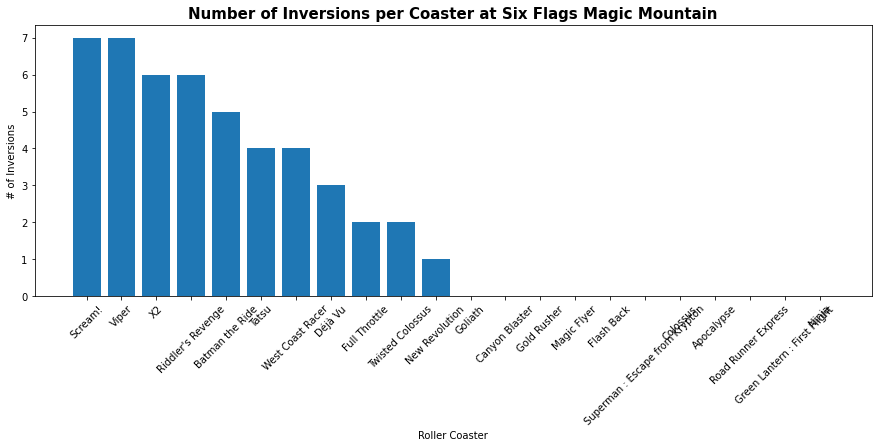

In [156]:
# Create a function to plot inversions by coaster at park
def plot_inversion_by_coaster(dataset, park_name):
    park_coasters = dataset[dataset['park'] == park_name]
    park_coasters = park_coasters.sort_values('num_inversions', ascending=False)
    coaster_names = park_coasters['name']
    number_inversions = park_coasters['num_inversions']
    
    fig, ax = plt.subplots(figsize=(15,5))
    plt.bar(range(len(number_inversions)), number_inversions)
    ax.set_xticks(range(len(coaster_names)))
    ax.set_xticklabels(coaster_names, rotation=45)
    
    ax.set_title('Number of Inversions per Coaster at {}'.format(park_name), weight='bold', fontsize=15)
    ax.set_xlabel('Roller Coaster')
    ax.set_ylabel('# of Inversions')
    plt.show()
    
# Create barplot of inversions by roller coasters
plot_inversion_by_coaster(roller_coaster, 'Six Flags Magic Mountain')

### Function to plot the number of inversions into a bar chart of all the roller coasters for a park

Write a function that creates a pie chart that compares the number of operating roller coasters ('status.operating') to the number of closed roller coasters ('status.closed.definitely'). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

In [157]:
roller_coaster['status'].unique()

array(['status.operating', 'status.relocated', 'status.retracked',
       'status.closed.definitely', 'status.closed.temporarily',
       'status.unknown', 'status.construction', 'status.announced'],
      dtype=object)

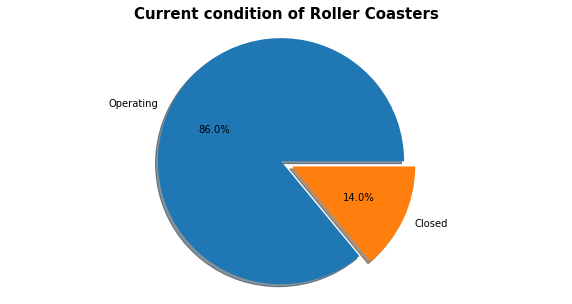

In [158]:
# Create a function to plot a pie chart of status.operating
def pie_chart_status(dataset):
    operating_coasters = dataset[dataset['status'] == 'status.operating']
    closed_coasters = dataset[dataset['status'] == 'status.closed.definitely']
    num_operating_coasters = len(operating_coasters)
    num_closed_coasters = len(closed_coasters)
    status_count = [num_operating_coasters, num_closed_coasters]
    
    plt.figure(figsize=(10,5))
    plt.pie(status_count, explode=(0, 0.1), autopct='%0.1f%%', labels=['Operating', 'Closed'], shadow=True)
    plt.axis('equal')
    plt.title('Current condition of Roller Coasters', fontsize=15, weight='bold')

# Create pie chart of roller coasters
pie_chart_status(roller_coaster)

### Function to plot the relation between numercial data

Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame.

In [159]:
roller_coaster['height'].nunique()

84

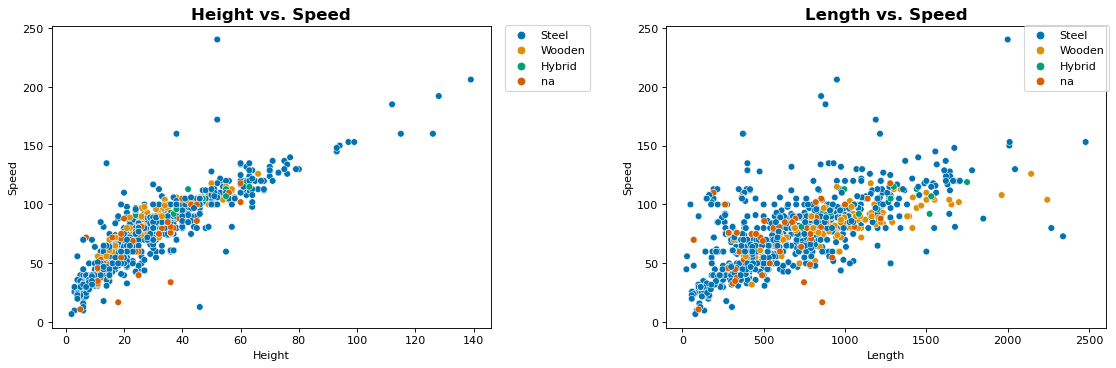

In [168]:
# Create a function to plot scatter of speed vs height and length vs speed
def scatter_plot(dataset, column_1, column_2, column_3):
    if column_1 == 'height':
        plot_data = dataset[dataset[column_1].dropna() <= 150]
    else:
        plot_data = dataset[dataset[column_1].dropna() <= 2500]
    
    sns.scatterplot(data=plot_data, x=column_1, y=column_2, hue=column_3, palette='colorblind')
    plt.title(f'{column_1.title()} vs. {column_2.title()}', weight='bold', fontsize=15)
    plt.xlabel(column_1.title())
    plt.ylabel(column_2.title())
    
    
# Create a scatter plot of roller coaster height by speed
plt.figure(figsize=(17, 5), dpi=80)
plt.subplots_adjust(wspace=0.4)
plt.subplot(1,2,1)
scatter_plot(roller_coaster, 'height', 'speed', 'material_type')
plt.legend(bbox_to_anchor=(1.02, 1.02))

plt.subplot(1,2,2)
scatter_plot(roller_coaster, 'length', 'speed', 'material_type')
plt.legend(bbox_to_anchor=(1.02, 1.02))

### extra 

#### What roller coaster seating type is most popular? And do different seating types result in higher/faster/longer roller coasters?

In [161]:
roller_coaster['seating_type'].value_counts()[:10].reset_index()

,index,seating_type
0,Sit Down,953
1,Inverted,104
2,Spinning,54
3,Suspended,26
4,Flying,23
5,Floorless,22
6,Water Coaster,16
7,Stand Up,16
8,4th Dimension,15
9,Motorbike,11


In [162]:
# Different seating types result in higher/faster/longer in roller coaster
def plot_seating_type(dataset, column):
    fig, ax = plt.subplots(figsize=(10,5))
    ax = sns.barplot(data=dataset, x='seating_type', y=column, palette='bright')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(f'Different Seating Type vs. {column.title()}', weight='bold')
    ax.set_xlabel('Seating Type')
    ax.set_ylabel(column.title())

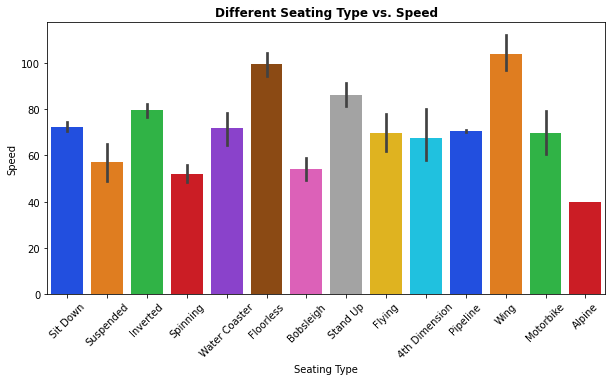

In [163]:
# Seating type vs Speed
plot_seating_type(roller_coaster, 'speed')

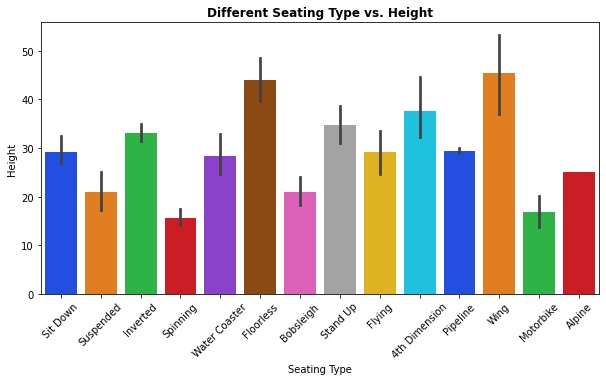

In [164]:
#seating type vs height
plot_seating_type(roller_coaster, 'height')

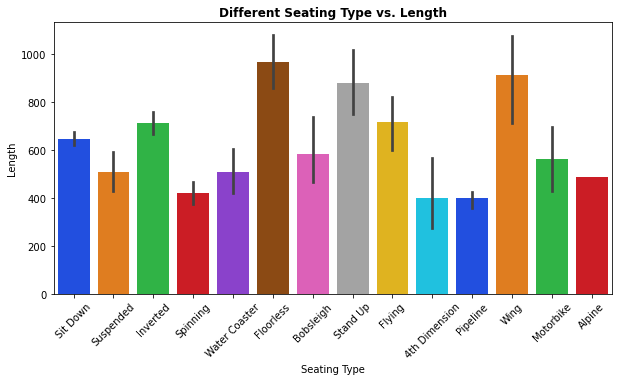

In [165]:
# Seating type vs length
plot_seating_type(roller_coaster, 'length')

- The most popular seating types are sit down has built for 953 roller coasters.
- Wing is the most popular seating's type based on speed and height of coaster, while seating type for length of coaster is floorless.

#### Do roller coaster manufacturers have any specialties (do they focus on speed, height, seating type, or inversions)?

In [42]:
# num of manufacturer
roller_coaster.manufacturer.nunique()

73

In [44]:
roller_coaster['manufacturer'].value_counts()[:10].reset_index()

,index,manufacturer
0,Vekoma,217
1,Intamin,112
2,B&M,107
3,Zierer,88
4,Mack,81
5,Schwarzkopf,71
6,Arrow,60
7,Gerstlauer,58
8,Maurer,46
9,Zamperla,38


In [46]:
# manufacturers have any specialities (on speed and height)
def plot_manufacturers(dataset, column):
    manufacturers = dataset[dataset['manufacturer'] == column]
    speed = manufacturers.speed.values
    height = manufacturers.height.values
    
    fig, ax = plt.subplots(figsize=(10,5))
    plt.scatter(x=speed, y=height, alpha=0.5)
    
    ax.set_title(f'Roller Coaster manufacturer by {column.title()}', weight='bold')
    ax.set_xlabel('Speed')
    ax.set_ylabel('Height')

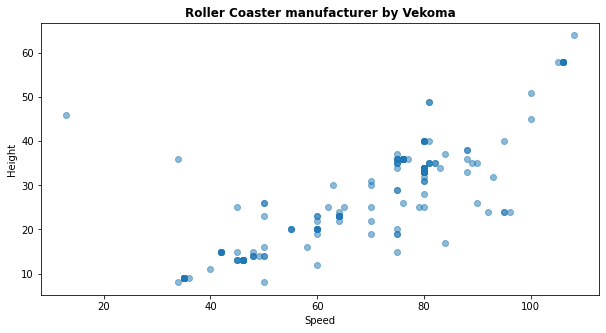

In [48]:
# Manufacturer by Vekoma
plot_manufacturers(roller_coaster, 'Vekoma')

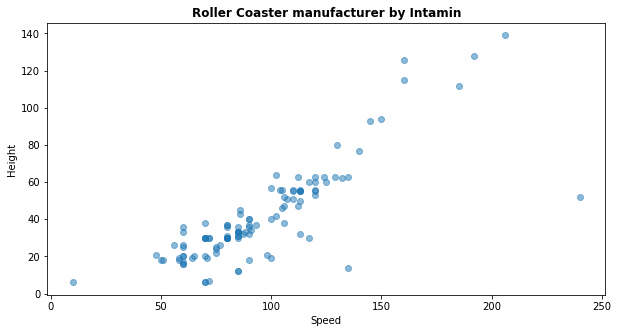

In [50]:
# Manufacturer by Intamin
plot_manufacturers(roller_coaster, 'Intamin')

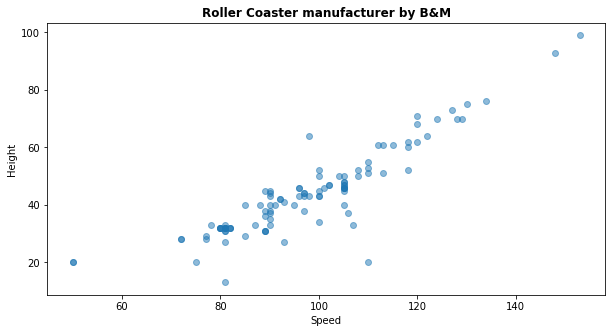

In [51]:
# Manufacturer by B&M
plot_manufacturers(roller_coaster, 'B&M')

- Vekoma has manufactured the most roller coaster total 217. Speed and height are in range (50 meters, 100 kilometers/hours)
- 112 Roller coasters that have been manufactured by Intamin have heigt and spee in range (140 meters, 240 kilometers/hours)
- While B&M has manufactured 107 roller coasters with speed and heigh in range (100 meters, 140 kilometers/hours) 

In [78]:
# manufacturers have any specialities (on seating type and inversions)
def manufacturer_seating_inversions(dataset, column):
    
    manufacturers = dataset[dataset['manufacturer'] == column]
    
    # filtered by seating_type dataset
    seating_types = manufacturers.groupby('seating_type').name.count().reset_index(name='count')
    
     # filtered by num_inversions dataset
    invers_num = manufacturers.groupby('num_inversions').name.count().reset_index(name='count')
    
    plt.figure(figsize=(15, 5), dpi=150)
    
    # plot a bar chart of the manufacturer's coasters categoried by seating type
    ax = plt.subplot(1,2,1)
    #plt.subplots_adjust(wspace=0.2)
    x = range(len(seating_types['seating_type'].values))
    ax.bar(x, seating_types['count'], color='cyan') 
    ax.set_xlabel('Seating Type')
    ax.set_ylabel('Count')
    ax.set_xticks(x)
    ax.set_xticklabels(seating_types['seating_type'], rotation=45)
    
    # plot a bar chart of the manufacturer's coasters categoried by inversion numbers
    ax2 = plt.subplot(1,2,2)
    x1 = range(len(invers_num['num_inversions'].values))
    ax2.bar(x1, invers_num['count'], color='magenta') 
    ax2.set_xlabel('Num of Inversions')
    ax2.set_ylabel('Count')
    ax2.set_xticks(x1)
    ax2.set_xticklabels(invers_num['num_inversions'], rotation=15)
    
    plt.suptitle(f'Manufacturer by {column.title()}', weight='bold', fontsize=15)

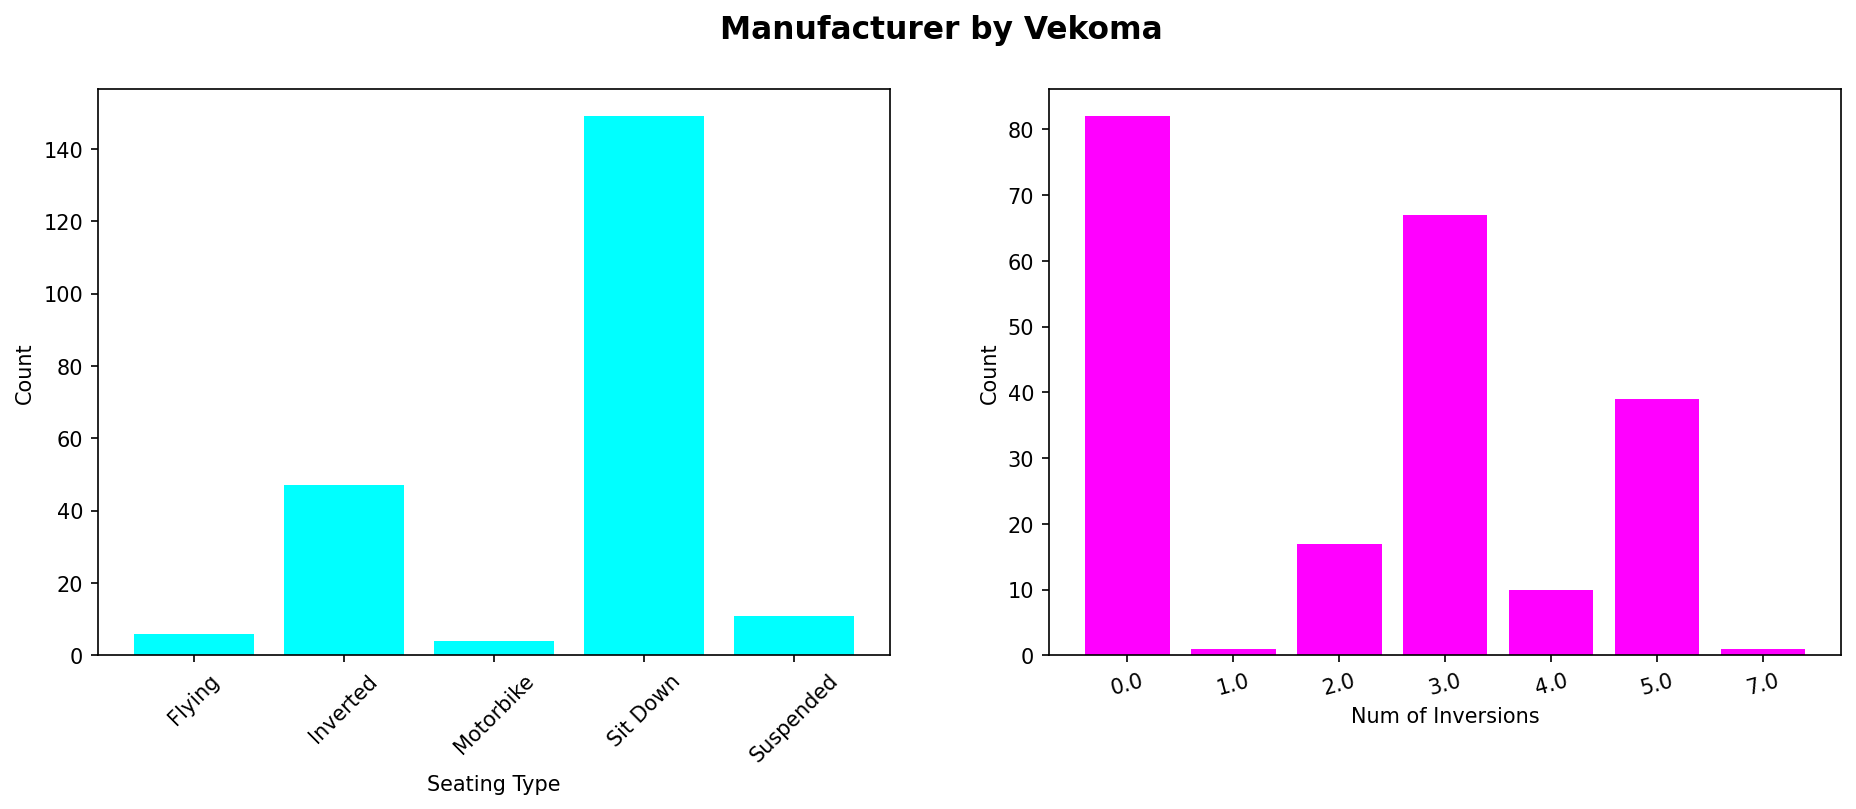

In [79]:
# Manufacturer by Vekoma
manufacturer_seating_inversions(roller_coaster, 'Vekoma')

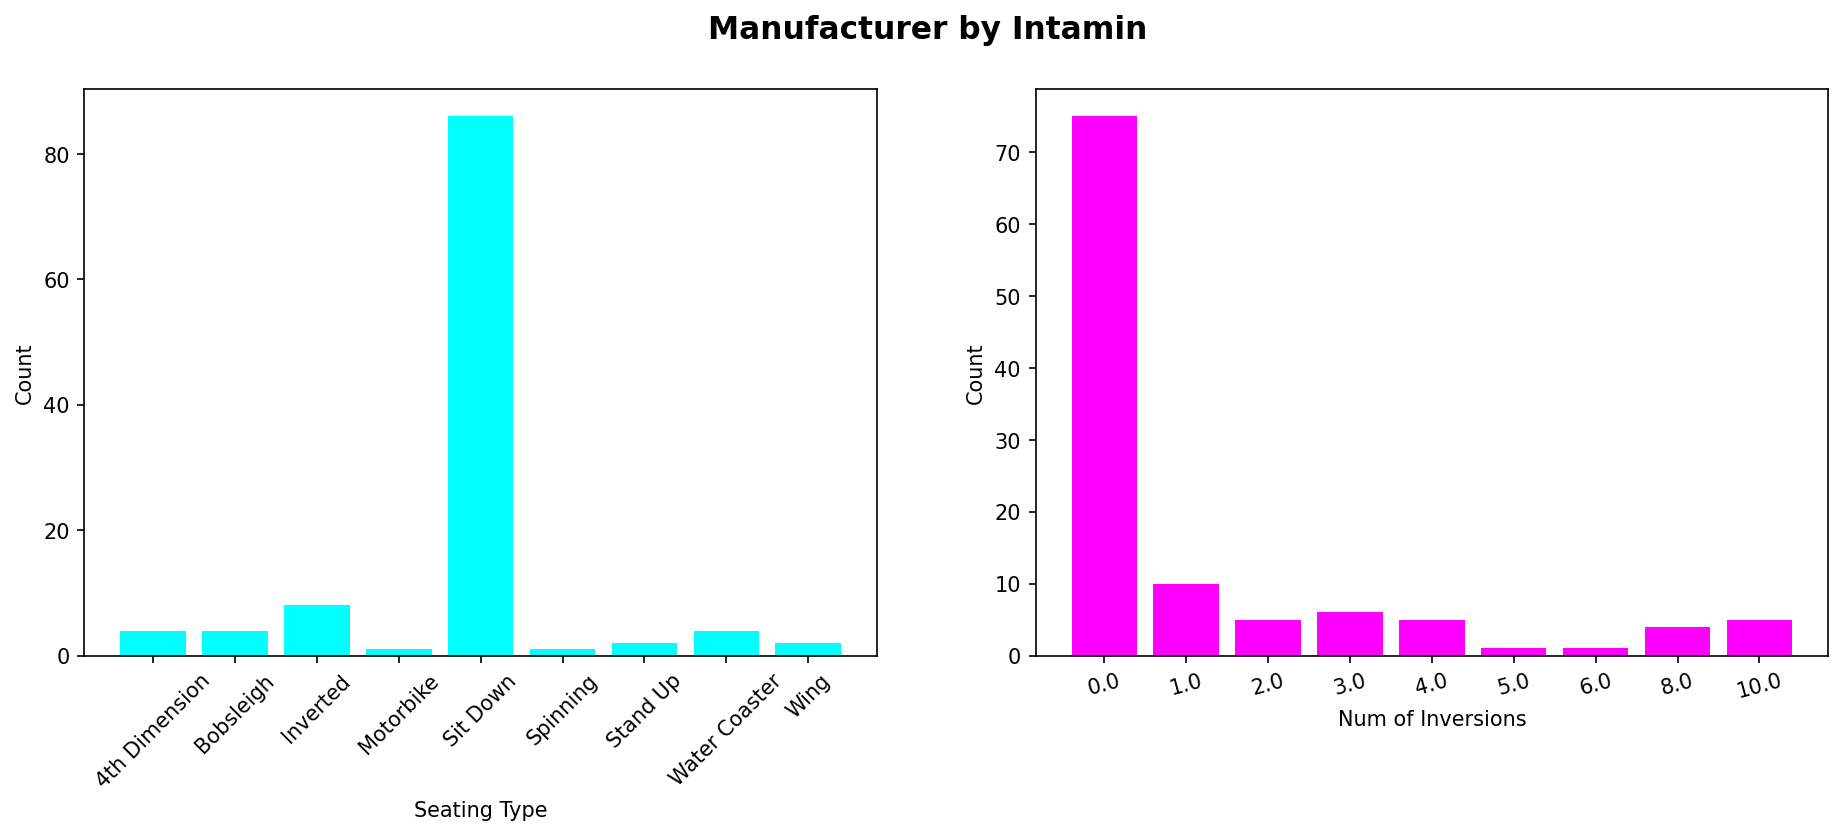

In [80]:
# Manufacturer by Intamin
manufacturer_seating_inversions(roller_coaster, 'Intamin')

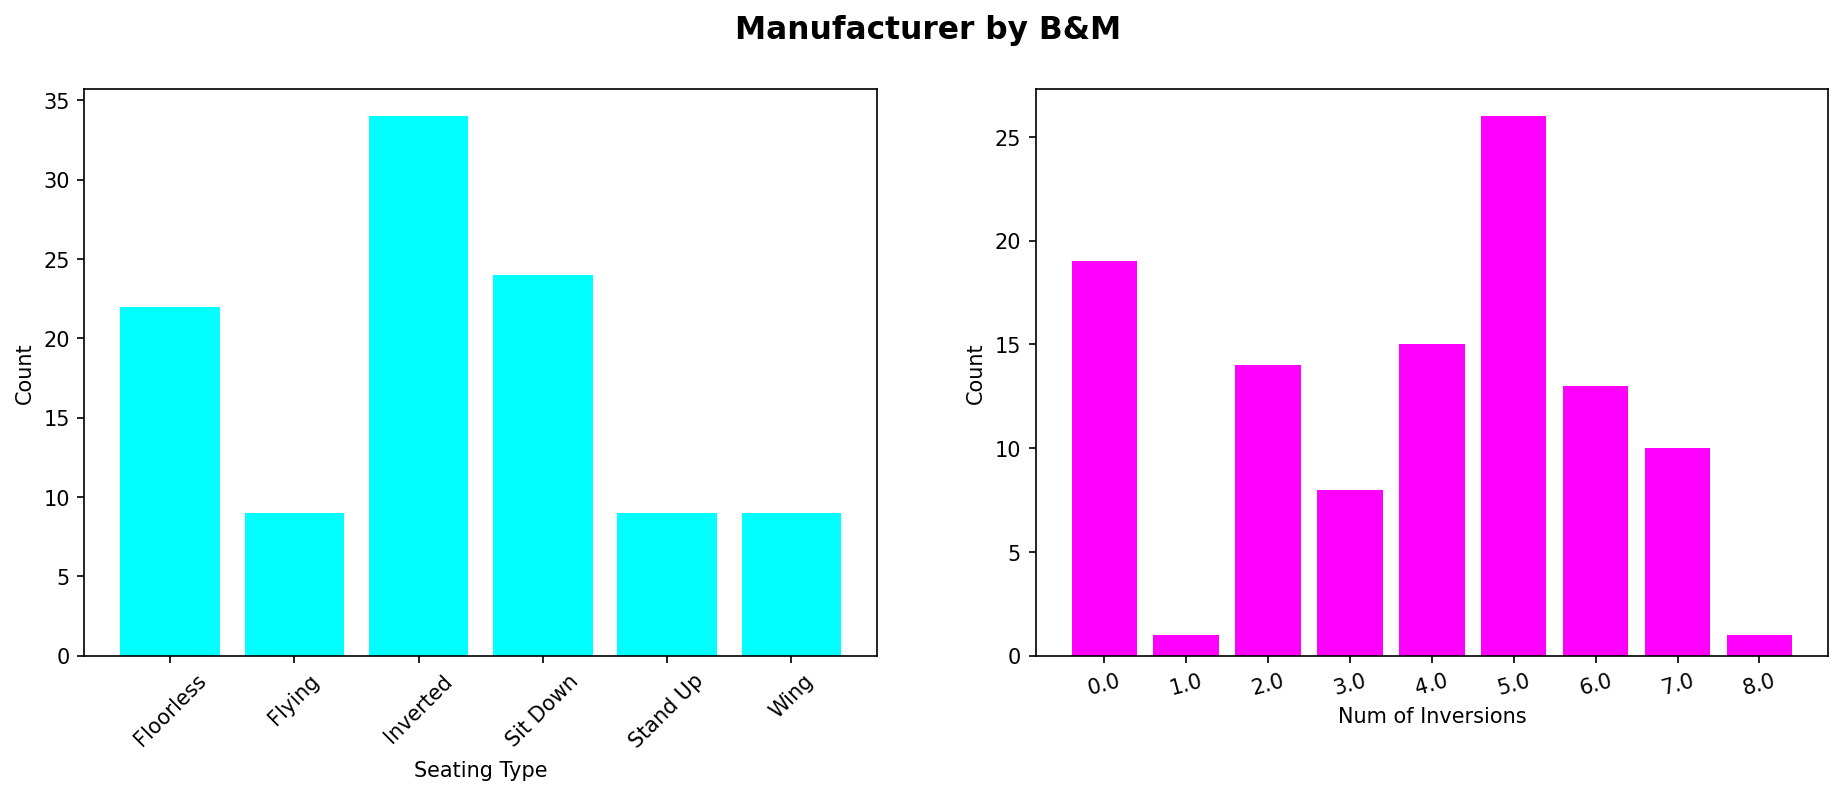

In [81]:
# Manufacturer by B&M
manufacturer_seating_inversions(roller_coaster, 'B&M')

- The most coaster seating type by Vekoma is sit down, while for inversion numbers the most set up 0, 3 and 5 respectively.
- Seating type is alsom the same for Intamin for the most constructed is sit down, the biggest inversion numbers are 0.
- For B&M inverted is the highest number of seating type that has been constructed, for range inversion numbers are more wider 5, 0, 4, 2, 6, 7 respectively.

#### Do amusement parks have any specialties?

In [83]:
# check the top 5 parks have most roller coasters
roller_coaster['park'].value_counts()[:5].reset_index()

,index,park
0,Six Flags Magic Mountain,22
1,Foire,21
2,Cedar Point,21
3,Canada's Wonderland,16
4,Kings Island,16


In [84]:
# The highest roller coaster in the park
roller_coaster['height'].max()

902.0

In [85]:
# the name of park that has hihgest coaster
roller_coaster.loc[roller_coaster['height'] == 902.0, 'park'].value_counts().reset_index()

,index,park
0,Adventure Island,1
1,Codona's Amusement Park,1


In [86]:
roller_coaster[(roller_coaster['height'] == 902)]

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
683,Mighty Mini Mega,Steel,Sit Down,40.0,902.0,233.0,0.0,Pinfari,Adventure Island,status.operating
730,Crazy Train,Steel,Sit Down,40.0,902.0,233.0,0.0,Pinfari,Codona's Amusement Park,status.operating


In [87]:
# The fastest roller coaster in the park
roller_coaster['speed'].max()

240.0

In [88]:
# the name of park that has fastest coaster
roller_coaster[(roller_coaster['speed'] == 240)]

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
1397,Formula Rossa,Steel,Sit Down,240.0,52.0,2000.0,0.0,Intamin,Ferrari World,status.operating


In [89]:
# The longest roller coaster
roller_coaster['length'].max()

2479.0

In [90]:
# the name of park that has longest coaster
roller_coaster[(roller_coaster['length'] == 2479)]

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
603,Steel Dragon 2000,Steel,Sit Down,153.0,97.0,2479.0,0.0,Morgan,Nagashima Spa Land,status.operating


- Nagashima Spa Land's park has the longest roller coaster is 2479 meters.
- Ferrari World's park has the fastest roller coaster is 52 meters.
- While the highest roller coaster is in the Adventure Island's park and Codona's Amusement Park.
- Whereas Six Flags Magic Mountain's park has most roller coaster 22.

In [107]:
# park specialities 
def park_specialities(dataset, column):
    park_coasters = dataset[dataset['park'] == column]
    seating_types = park_coasters.groupby('seating_type').name.count().reset_index(name='count')
    invers_num = park_coasters.groupby('num_inversions').name.count().reset_index(name='count')
    
    plt.figure(figsize=(13, 5), dpi=150)
    
    # plot a scatter of park specialities (height and speed)
    ax3 = plt.subplot(2,1,1)
    plt.subplots_adjust(hspace=0.5)
    speed = park_coasters.speed.values
    height = park_coasters.height.values
    
    ax3.scatter(speed, height, alpha=0.4, color='magenta') 
    ax3.set_xlabel('Speed')
    ax3.set_ylabel('Height')
  
    
    # plot a bar graph of park specialities (height and speed)
    ax = plt.subplot(2,2,3)
    x = range(len(seating_types['seating_type'].values))
    ax.bar(x, seating_types['count'], color='cyan') 
    ax.set_xlabel('Seating Type')
    ax.set_ylabel('Count')
    ax.set_xticks(x)
    ax.set_xticklabels(seating_types['seating_type'], rotation=45)
    
    # plot a bar chart of the manufacturer's coasters categoried by inversion numbers
    ax2 = plt.subplot(2,2,4)
    x1 = range(len(invers_num['num_inversions'].values))
    ax2.bar(x1, invers_num['count'], color='magenta') 
    ax2.set_xlabel('Num of Inversions')
    ax2.set_ylabel('Count')
    ax2.set_xticks(x1)
    ax2.set_xticklabels(invers_num['num_inversions'], rotation=15)
    
    plt.suptitle(f'Amusent Park {column.title()}', weight='bold', fontsize=15)

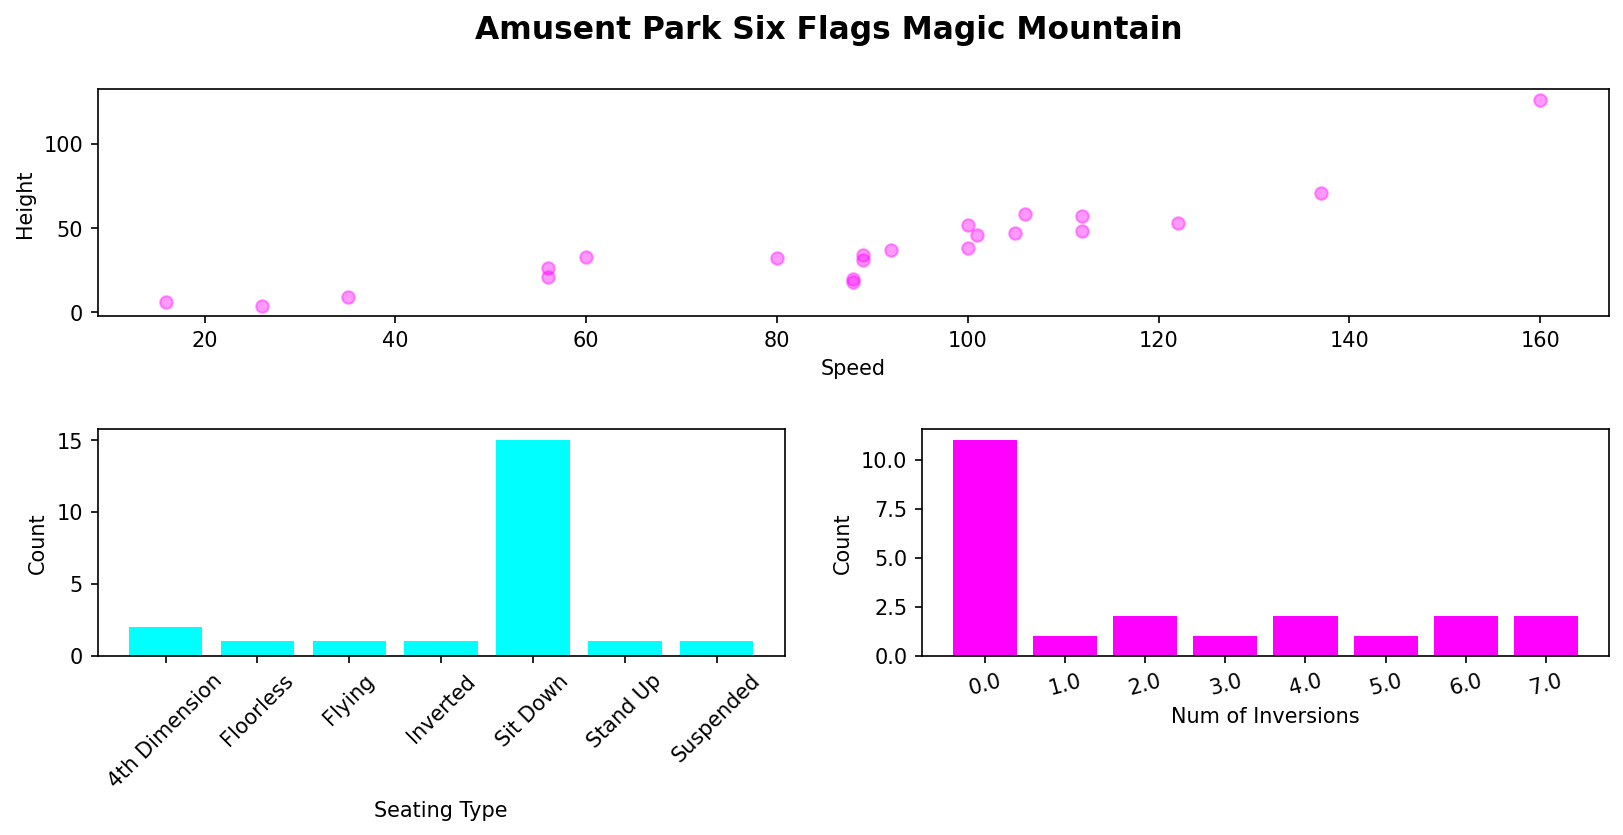

In [108]:
# Six Flags Magic Mountain park
park_specialities(roller_coaster, 'Six Flags Magic Mountain')

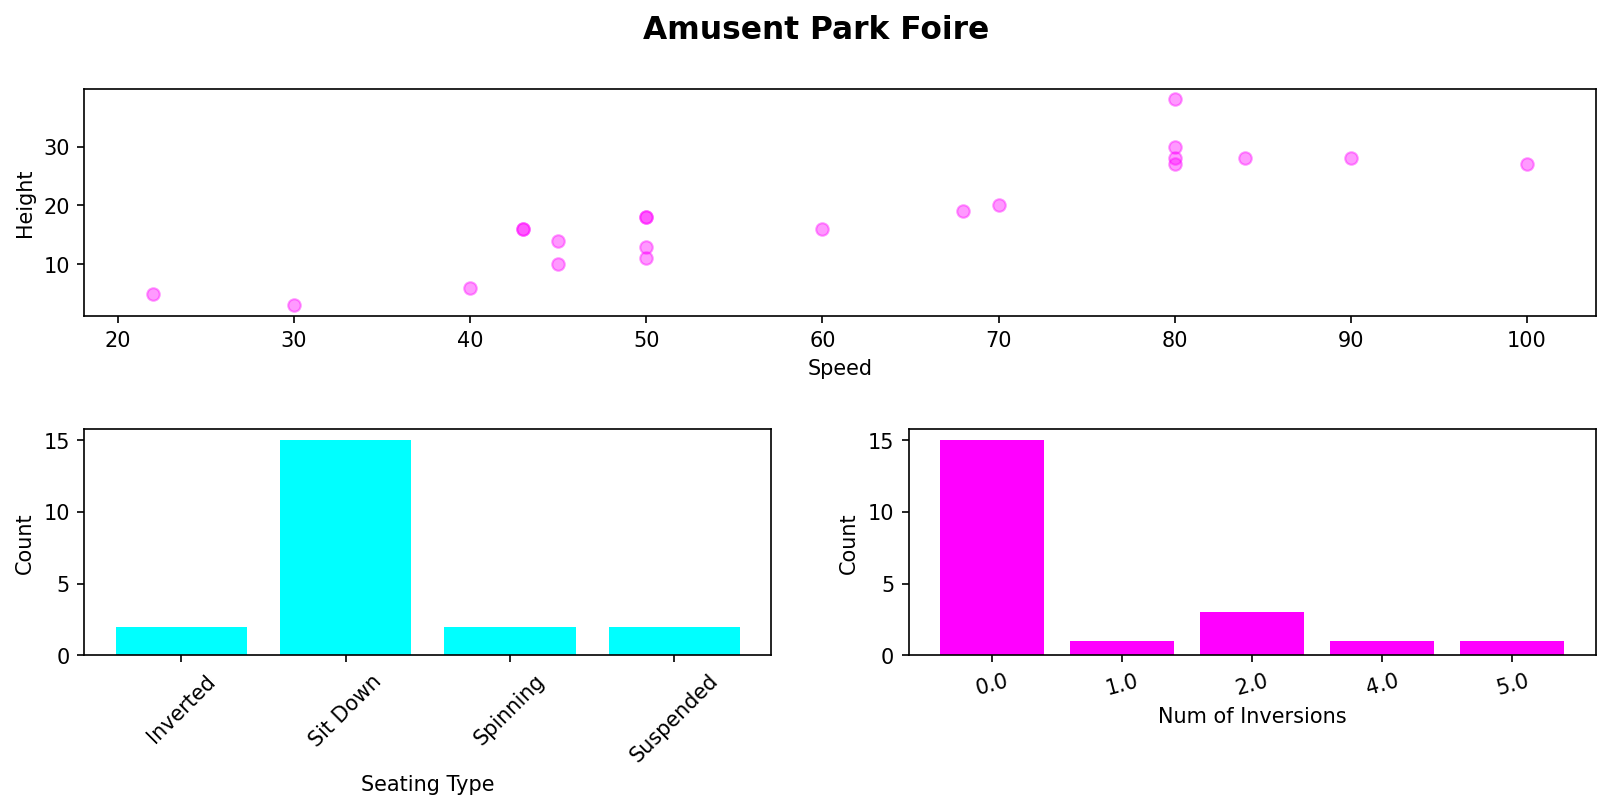

In [109]:
# Foire park
park_specialities(roller_coaster, 'Foire')

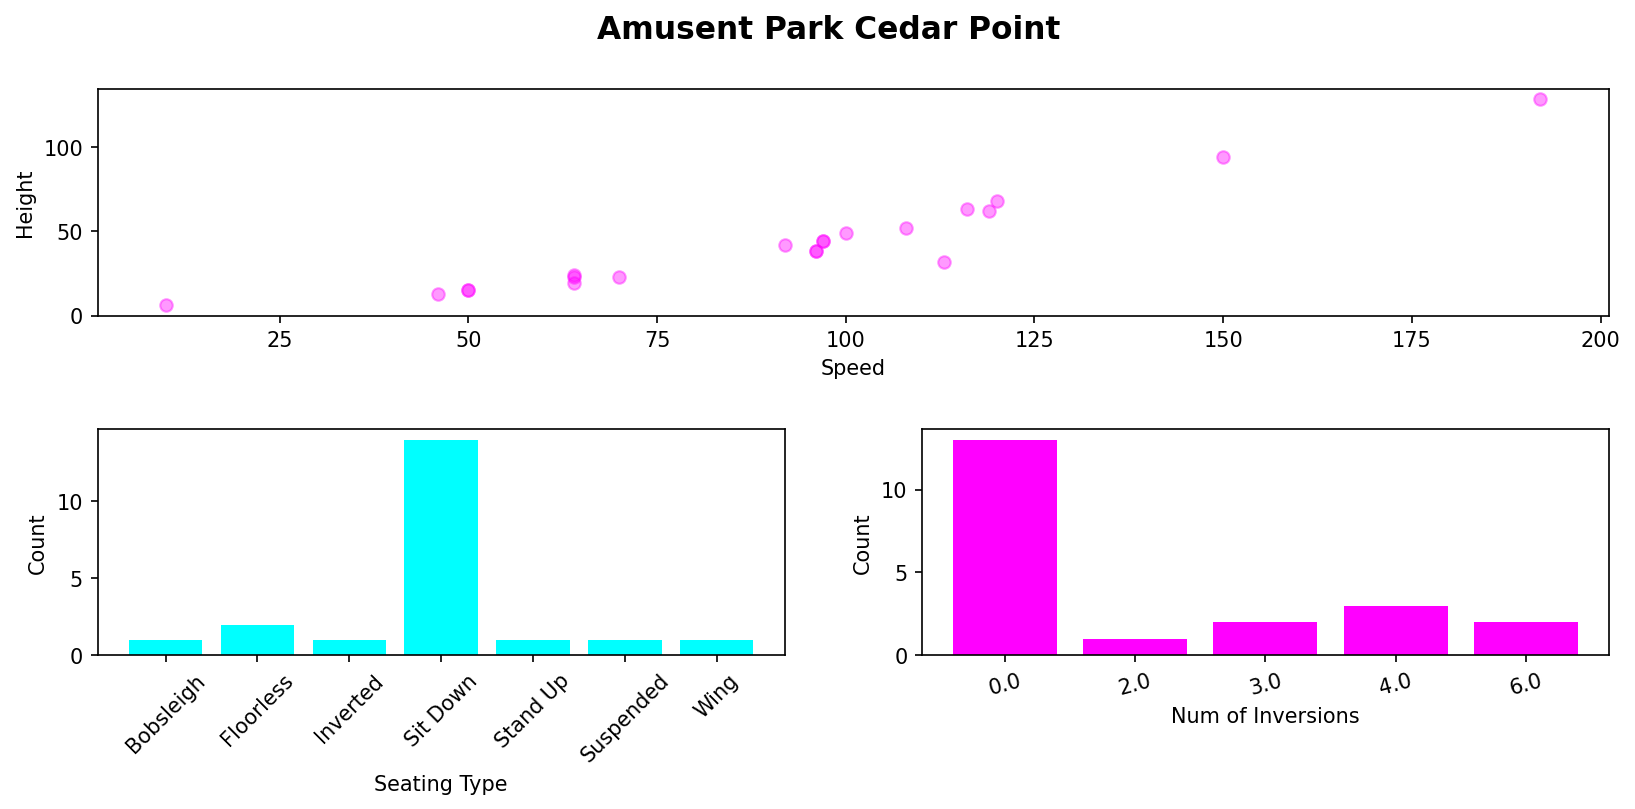

In [110]:
# Six Flags Magic Mountain
park_specialities(roller_coaster, 'Cedar Point')

- Six Flags Magic Mountain park has 22 roller coaster, it is the most coaster in the parks.
- The Foire park and the Cedar Poin park have second most coaster in the park each is 21.
- Six Flags Magic Mountain park and  the Foire park have height and speed in range (30 meters, 100 kilometers/hours), while the Cedar Poin Park has more height and speed in range (100 meters, 200 kilometers/hours).
- The most popular seating type for three of them are sit down with 0 number of inversion.

## Summary

### Roller Coaster (2013 - 2018) by Golden Ticket Awards

### Based on Material
- Total Roller Coasters in dataset :
    - Wood : 61 roller coasters
    - Steel : 63 roller coasters
- Total suppliers are included in the rankings :
    - Wood : 32 suppliers
    - Steel : 15 suppliers
    
###### Ranking of years :
- Top 5 rankings of wood roller coaster 
    - <b>Boulder Dash</b> won over El Toro and Phoenix for 4 years in a row since 2013, while since 2017 the ranking has dropped. While <b>El Toro</b> was one of front runners over the periode. <b>Phoenix</b> had gotten better rank dan become its important during 2016-2018. These are interesting to investigate more about why Boulder Dash had worse performance thank before while Phoenix could do better.
- Top 5 rankings of steel roller coaster
    - There were many roller coasters that were in top 5 during these years but it was clear that Millennium Force and Fury 325 were ones of the front runners. Both of them were the first runner-up and the winner in 2016-2018 in turn. However, Steel Vengeance might be a dark horse since it was just completely constructed in 2018 and ranked the second runner-up in the same year.

### Roller Coasters insight
- Speed was between 7-240 kilometers/hours
- Height was between 2-902 meters
- Length was between 25-2479
- Inversion was between 0-14
- Material :
    - Steel : 1040
    - Wood : 136
    - Null (no description) : 72
    - Hybrid : 17


### Other Finding
- The total of roller coasters in the parks are 1,265. Around 85% (1,088) roller coasters are still operating.
- Speed and height of roller coasters have linier relationship. The higher a roller coaster is, the fastest the speed.
- The majority of roller coasters had no inversion.

###### The most popular roller coaster seating type and different seating types result in higher/faster/longer roller coasters :
- The most popular seating types are sit down has built for 953 roller coasters.
- Wing is the most popular seating's type based on speed and height of coaster, while seating type for length of coaster is floorless. 

###### Specialities of manufacturers roller coaster (speed, height, seating type, or inversions) :
- Vekoma manufactured the most roller coaster total 217. Speed and height are in range (50 meters, 100 kilometers/hours)
- 112 Roller coasters that have been manufactured by Intamin have heigt and spee in range (140 meters, 240 kilometers/hours)
- While B&M has manufactured 107 roller coasters with speed and heigh in range (100 meters, 140 kilometers/hours)
    
##### Specialities in amusement parks
- Nagashima Spa Land's park has the longest roller coaster is 2479 meters.
- Ferrari World's park has the fastest roller coaster is 52 meters.
- While the highest roller coaster is 902 meters in the Adventure Island's park and Codona's Amusement Park.
- Whereas Six Flags Magic Mountain's park has most roller coaster 22.

Six Flags Magic Mountain park has 22 roller coaster, it is the most coaster in the parks.
The Foire park and the Cedar Poin park have second most coaster in the park each is 21.
Six Flags Magic Mountain park and the Foire park have height and speed in range (30 meters, 100 kilometers/hours), while the Cedar Poin Park has more height and speed in range (100 meters, 200 kilometers/hours).
The most popular seating type for three of them are sit down with 0 number of inversion.

###### Notice: This dataset had not been cleaned enough and had some errors that should be managed.

There are the same coaster names but were written differently, for example, "Superman The Ride" and "Superman: The Ride". Therefore, they were recognized as different roller coasters when ploting top 5 steel roller coasters over time.